In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import matplotlib.pyplot as plt

### First we will create Data loader...

In [50]:
torch.manual_seed(42) # For reproducibility

In [ ]:
# Check for GPU
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Using device: {device}")

In [51]:
df = pd.read_csv("FMNIST.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


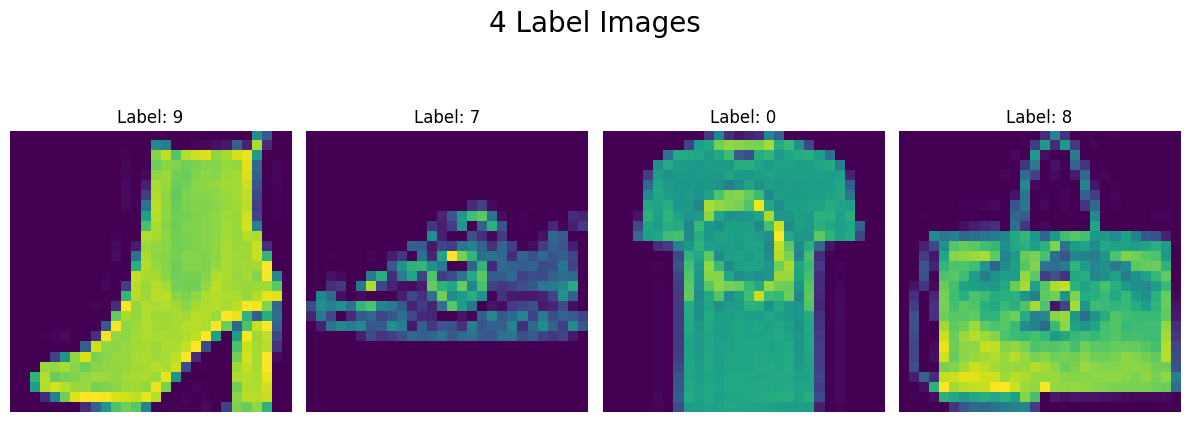

In [52]:
fig, axes = plt.subplots(1, 4, figsize=(12, 5))
fig.suptitle("4 Label Images", fontsize=20)

for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[i, 0]}")

plt.tight_layout()
plt.show()

In [53]:
x = df.iloc[:, 1:].values # Input
y = df.iloc[:, 0].values # Labels

In [54]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42) # Splitting the data

In [55]:
# Normalizing the data (Scaling)
xTrain = xTrain/255.0
xTest = xTest/255.0

In [56]:
# Creating custom Dataset
class customDataset(Dataset):

    def __init__(self, features, labels):
        super().__init__()
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [57]:
# Creating Training Dataset
trainDataset = customDataset(xTrain, yTrain)
# len(trainDataset) -> 4800
# trainDataset[1]

In [58]:
# Create Test Dataset
testDataset = customDataset(xTest, yTest)
# len(testDataset)

In [ ]:
# For CPU
trainLoader = DataLoader(trainDataset, batch_size=32, shuffle=True)
testLoader = DataLoader(testDataset, batch_size=32, shuffle=False)

# For GPU, You can even use larger batch size to optimize gpu usage
# trainLoader = DataLoader(trainDataset, batch_size=32, shuffle=True, pin_memory=True)
# testLoader = DataLoader(testDataset, batch_size=32, shuffle=False, pin_memory=True)

In [60]:
len(trainLoader)

150

### Now we will write the training loop!

In [61]:
class MnistNN(nn.Module):

    def __init__(self, numFeatures):
        super().__init__()
        self.model = nn.Sequential (
            nn.Linear(numFeatures, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10) # No need for Explicit SOftmax declaration, it is inbuilt in pytorch
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
# Set the values of epochs and learning rate
epochs = 100
ALPHA = 0.1

# Instantiate the model
model = MnistNN(xTrain.shape[1])
# model = model.to(device) # For GPU

# Loss function
criterian = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=ALPHA)

In [ ]:
# Trainig Loop

for epoch in range(epochs):
    totalLoss = 0
    for batchFeatures, batchLabels in trainLoader:
        # move data to gpu
        # batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        outputs = model(batchFeatures) # Forward pass
        loss = criterian(outputs, batchLabels) # Loss
        totalLoss += loss.item()
        optimizer.zero_grad() # Flushing Gradients
        loss.backward() # Back Pass
        optimizer.step() # Update
    print(f"Epoch: {epoch + 1} | Avg. Loss: {totalLoss/len(trainLoader)}")

Epoch: 1 | Avg. Loss: 1.3216368504365286
Epoch: 2 | Avg. Loss: 0.7793365408976872
Epoch: 3 | Avg. Loss: 0.6427524624268214
Epoch: 4 | Avg. Loss: 0.5751657460133235
Epoch: 5 | Avg. Loss: 0.5281801898280779
Epoch: 6 | Avg. Loss: 0.49528749763965607
Epoch: 7 | Avg. Loss: 0.4602433065573374
Epoch: 8 | Avg. Loss: 0.43594591185450554
Epoch: 9 | Avg. Loss: 0.41829214841127393
Epoch: 10 | Avg. Loss: 0.39840923100709913
Epoch: 11 | Avg. Loss: 0.3850264552235603
Epoch: 12 | Avg. Loss: 0.37226854811112087
Epoch: 13 | Avg. Loss: 0.3477547161777814
Epoch: 14 | Avg. Loss: 0.3474744820594788
Epoch: 15 | Avg. Loss: 0.3161507587134838
Epoch: 16 | Avg. Loss: 0.31181849469741185
Epoch: 17 | Avg. Loss: 0.29523012270530063
Epoch: 18 | Avg. Loss: 0.28590739210446675
Epoch: 19 | Avg. Loss: 0.275126261562109
Epoch: 20 | Avg. Loss: 0.26529103291531403
Epoch: 21 | Avg. Loss: 0.2628463419278463
Epoch: 22 | Avg. Loss: 0.24405769457419713
Epoch: 23 | Avg. Loss: 0.24060092940926553
Epoch: 24 | Avg. Loss: 0.22429207

### Model Evaluation :{}

In [ ]:
# Set model to eval model
model.eval()

MnistNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluation Code
total = 0
correct = 0

with torch.no_grad():
    for batchFeatures, batchLabels in testLoader:
        # move data to gpu
        # batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        outputs = model(batchFeatures)
        for index in range(len(outputs)):
            predictedLabel = torch.max(outputs[index], 0)[1]
            actualLabel = batchLabels[index]
            if predictedLabel == actualLabel:
                correct = correct + 1
            total = total + 1

Accuracy = correct / total
print(f"Accuracy is {Accuracy}")

Accuracy is 0.8258333333333333
